Step 1. Install YOLOv8 Framework in Colab

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.0 MB/s eta 0:00:00


2. Run a Quick Test on a Sample Image

Defining the image directory, loading the pre-trained model (e.g., yolov8m.pt), and preparing the empty data structure (yolo_raw_results) to capture metrics.

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1176.5ms
Speed: 13.3ms preprocess, 1176.5ms inference, 32.4ms postprocess per image at shape (1, 3, 640, 480)


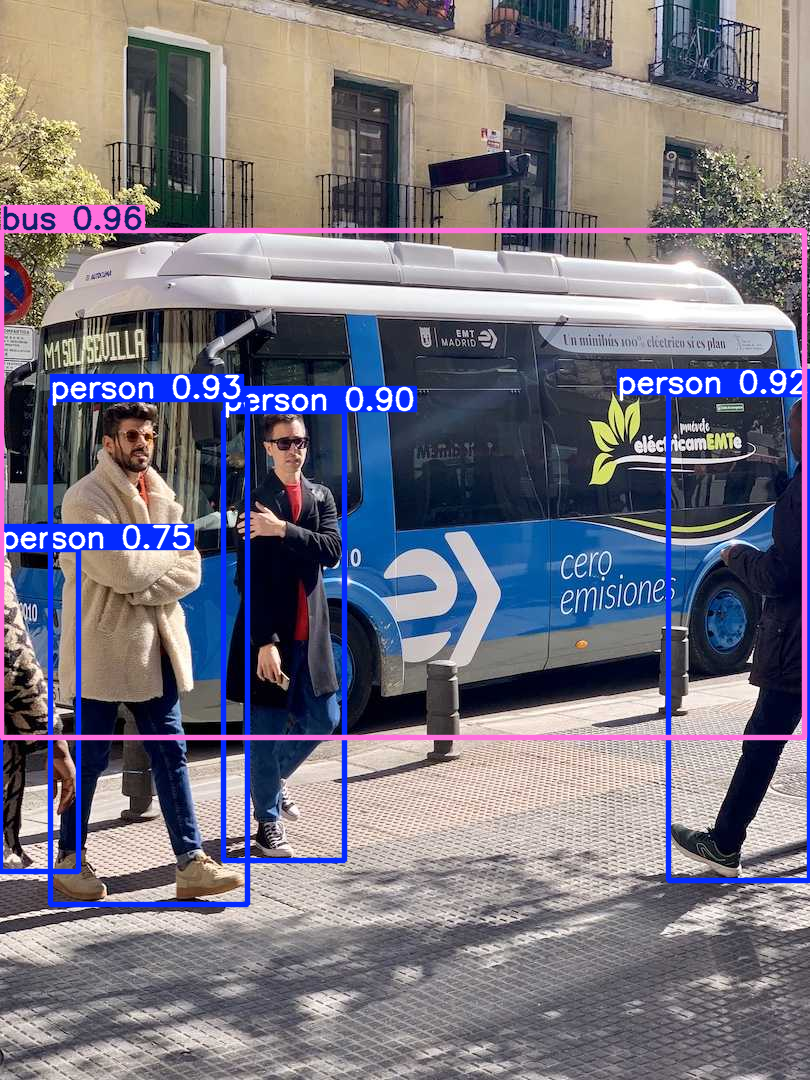

In [2]:
from ultralytics import YOLO
from PIL import Image

# Load a pre-trained YOLOv8 model (using the medium size model for good balance)
model = YOLO('yolov8m.pt')

# Run inference on a simple test image (replace 'path/to/your/image.jpg' with a link or file upload in Colab)
# Alternatively, you can run inference on a default image built into the library
results = model('https://ultralytics.com/images/bus.jpg')

# The 'results' object holds all the detection data (bounding boxes, probabilities, etc.)
# You can display the detected image easily
results[0].show()

Step 3:	Iterating through all images, capturing the start time, executing the model inference (detection), processing the resulting bounding boxes and probabilities, calculating the run time, and storing the metrics.

A. Necessary Imports and Setup

In [18]:
import time
import os
from ultralytics import YOLO

# 1. Define the path where you uploaded your images
IMAGE_DIR = 'images'
# 2. List all image files in that directory
image_files = [os.path.join(IMAGE_DIR, f) for f in os.listdir(IMAGE_DIR) if f.endswith(('.jpg', '.jpeg', '.png'))]

# 3. Load the pre-trained YOLOv8 model (yolov8m.pt is a good, balanced model)
model = YOLO('yolov8m.pt')

# 4. Initialize a list to store results for later comparison
yolo_results = []

print(f"Found {len(image_files)} images to process.")

Found 16 images to process.


B. Loop Through Images and Collect Data

This code block will perform the core task of detection and recording the results.

In [19]:
print("--- Running YOLOv8 Detection ---")
for image_path in image_files:
    print(f"\nProcessing {os.path.basename(image_path)}...")

    # Record start time
    start_time = time.time()

    # Run inference. The verbose=False suppresses the lengthy output for cleaner display.
    results = model(image_path, verbose=False)

    # Record end time and calculate inference duration
    end_time = time.time()
    inference_time = end_time - start_time

    # Process detections
    detections = []
    # Loop through the detection boxes (Results.boxes)
    for box in results[0].boxes:
        # Get class name (e.g., 'person', 'car') and confidence score (probability)
        class_id = int(box.cls[0].item())
        confidence = round(box.conf[0].item(), 4)
        class_name = model.names[class_id]

        detections.append({
            'object': class_name,
            'probability': confidence
        })

    # Store the complete result set
    yolo_results.append({
        'image': os.path.basename(image_path),
        'model': 'YOLOv8',
        'time': inference_time,
        'detections': detections
    })

    print(f"Time: {inference_time:.4f} seconds. Detected {len(detections)} objects.")

print("--- YOLOv8 Detection Complete ---")

--- Running YOLOv8 Detection ---

Processing ace ventura.jpg...
Time: 1.0609 seconds. Detected 10 objects.

Processing Waynes world.jpg...
Time: 0.8468 seconds. Detected 4 objects.

Processing office_space_kj3wup.jpeg...
Time: 0.7935 seconds. Detected 22 objects.

Processing endless summer.jpeg...
Time: 0.7764 seconds. Detected 6 objects.

Processing borat.jpg...
Time: 0.7520 seconds. Detected 11 objects.

Processing air bud.jpeg...
Time: 1.1053 seconds. Detected 4 objects.

Processing MV5BMjQyNzE0MzQ3Nl5BMl5BanBnXkFtZTgwMjgwNDk2NjE@._V1_.jpg...
Time: 1.6080 seconds. Detected 19 objects.

Processing organize-garage-august-2023.jpg...
Time: 0.9775 seconds. Detected 3 objects.

Processing forgetting Sarah Marshall.jpg...
Time: 0.7848 seconds. Detected 10 objects.

Processing blackhawk.jpg...
Time: 0.9048 seconds. Detected 6 objects.

Processing organized-garage-bins-paint-strips-3CKIk-xWK53B6sOjGjz5f--2000-c24c1b0d5e9c43edadb38ec109fefde1.jpg...
Time: 0.8344 seconds. Detected 3 objects.


Step4: Run Model 1 (YOLOv8)

A. Imports and Setup

In [30]:
import time
import os
import pandas as pd
from ultralytics import YOLO

# 1. Define the path using your created folder name: images.2
# Note: Using the period is fine, Python handles it correctly.
IMAGE_DIR = 'images.2'
# 2. List all image files in that directory
image_files = [os.path.join(IMAGE_DIR, f) for f in os.listdir(IMAGE_DIR) if f.endswith(('.jpg', '.jpeg', '.png'))]

# 3. Load the pre-trained YOLOv8 model
model = YOLO('yolov8m.pt')

# 4. Initialize a list to store results for later comparison
yolo_raw_results = []

print(f"Found {len(image_files)} images to process.")

Found 16 images to process.


B. Loop Through Images and Collect Data

This block performs the detection, records the time, object count, and probability for each detection, and stores it in the yolo_raw_results list.

In [31]:
print("--- Running YOLOv8 Detection ---")
for image_path in image_files:
    # 1. Start timer
    start_time = time.time()

    # 2. Run inference. The save=True option creates a folder (runs/detect/...)
    # with the output images, which is useful for visual verification.
    results = model(image_path, verbose=False, save=True, exist_ok=True)

    # 3. Calculate inference duration
    inference_time = time.time() - start_time

    # 4. Process detections and extract data
    detections = []
    total_detections = 0

    # Extract results from the first (and usually only) image in the batch
    if results and results[0].boxes is not None:
        total_detections = len(results[0].boxes)
        for box in results[0].boxes:
            # Get class name (e.g., 'person', 'car') and confidence score (probability)
            class_id = int(box.cls[0].item())
            confidence = round(box.conf[0].item(), 4)
            class_name = model.names.get(class_id, f'Class_{class_id}')

            detections.append({
                'object': class_name,
                'probability': confidence
            })

    # 5. Store the complete result set
    yolo_raw_results.append({
        'Image': os.path.basename(image_path),
        'Model': 'YOLOv8',
        'Time_s': inference_time,
        'Num_Objects': total_detections,
        'Detections': detections
    })

    print(f"Time: {inference_time:.4f}s. Detected {total_detections} objects in {os.path.basename(image_path)}.")

# Convert to a DataFrame for easy viewing and compilation
yolo_df = pd.DataFrame(yolo_raw_results)
print("\n--- YOLOv8 Results Summary ---")
print(yolo_df[['Image', 'Time_s', 'Num_Objects']])

--- Running YOLOv8 Detection ---
Results saved to /content/runs/detect/predict
Time: 1.0624s. Detected 10 objects in ace ventura.jpg.
Results saved to /content/runs/detect/predict
Time: 0.8981s. Detected 4 objects in Waynes world.jpg.
Results saved to /content/runs/detect/predict
Time: 0.8055s. Detected 22 objects in office_space_kj3wup.jpeg.
Results saved to /content/runs/detect/predict
Time: 0.7912s. Detected 6 objects in endless summer.jpeg.
Results saved to /content/runs/detect/predict
Time: 0.7720s. Detected 11 objects in borat.jpg.
Results saved to /content/runs/detect/predict
Time: 0.8175s. Detected 4 objects in air bud.jpeg.
Results saved to /content/runs/detect/predict
Time: 1.1219s. Detected 19 objects in MV5BMjQyNzE0MzQ3Nl5BMl5BanBnXkFtZTgwMjgwNDk2NjE@._V1_.jpg.
Results saved to /content/runs/detect/predict
Time: 0.9376s. Detected 3 objects in organize-garage-august-2023.jpg.
Results saved to /content/runs/detect/predict
Time: 0.7990s. Detected 10 objects in forgetting Sarah

Step 5: Implement Model 2 (Faster R-CNN)
Load the model, iterate through the same 16 images, measure the time, and record the objects detected along with their probabilities.

1. Environment Setup and Dependency Installation
First, ensure you have the necessary libraries installed. PyTorch and Torchvision are usually pre-installed in Colab, but running the installation command ensures they are available and up-to-date.

In [32]:
# Install/Update PyTorch and Torchvision (for the Faster R-CNN model)
!pip install torch torchvision

2. Model Initialization and Data Preparation

Load R-CNN model with a ResNet-50-FPN backbone (Feature Pyramid Network) - offers a good balance of speed and high accuracy using weights trained on the vast COCO dataset.

In [33]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
from PIL import Image
from torchvision.transforms import functional as F
import numpy as np

# Set the device to GPU if available, otherwise CPU (GPU is highly recommended for speed)
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"Using device: {DEVICE}")

# Load the pre-trained Faster R-CNN model with default COCO weights
# This model uses Transfer Learning from the massive COCO dataset
model_frcnn = fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)
model_frcnn.eval() # Set the model to evaluation mode (no training updates)
model_frcnn.to(DEVICE)

# Initialize a list to store results for later comparison
frcnn_raw_results = []

Using device: cpu


3. Inference Execution and Metric Collection (Faster R-CNN)

Since Faster R-CNN uses PyTorch tensors instead of the simple paths used by YOLO, the image loading and transformation process is slightly more complex, but crucial for obtaining accurate results.

In [34]:
# Reusing image_files list and IMAGE_DIR='images.2' from the YOLO section

print("--- Running Faster R-CNN Detection ---")
# PyTorch models use COCO classes, we need a list to map IDs to names
# We can use the class names provided by the model weights for COCO dataset
COCO_INSTANCE_CATEGORY_NAMES = FasterRCNN_ResNet50_FPN_Weights.COCO_V1.meta["categories"]

for image_path in image_files:
    image_name = os.path.basename(image_path)

    # 1. Load and transform the image to a PyTorch Tensor
    img = Image.open(image_path).convert("RGB")
    img_tensor = F.to_tensor(img).to(DEVICE)

    # 2. Start timer and run inference
    start_time = time.time()

    # Inference expects a list of tensors
    with torch.no_grad(): # Speeds up inference by not calculating gradients
        predictions = model_frcnn([img_tensor])

    inference_time = time.time() - start_time

    # 3. Process detections
    detections = []
    output = predictions[0]
    total_detections = 0

    # Filter predictions based on a confidence threshold (e.g., 0.7 for strong results)
    score_threshold = 0.7
    keep = output['scores'] > score_threshold

    # Get the detected scores and labels that meet the threshold
    scores = output['scores'][keep].cpu().numpy()
    labels = output['labels'][keep].cpu().numpy()

    total_detections = len(scores)

    for score, label in zip(scores, labels):
        # COCO reserves index 0 for background, so class names start at index 1
        class_name = COCO_INSTANCE_CATEGORY_NAMES[label - 1] # Subtract 1 because PyTorch's internal COCO mapping is 1-indexed

        detections.append({
            'object': class_name,
            'probability': round(score, 4)
        })

    # 4. Store the complete result set
    frcnn_raw_results.append({
        'Image': image_name,
        'Model': 'Faster R-CNN',
        'Time_s': inference_time,
        'Num_Objects': total_detections,
        'Detections': detections
    })

    print(f"Time: {inference_time:.4f}s. Detected {total_detections} objects in {image_name}.")

# Convert to a DataFrame for summary
frcnn_df = pd.DataFrame(frcnn_raw_results)
print("\n--- Faster R-CNN Results Summary ---")
print(frcnn_df[['Image', 'Time_s', 'Num_Objects']])

--- Running Faster R-CNN Detection ---
Time: 8.4556s. Detected 10 objects in ace ventura.jpg.
Time: 8.5765s. Detected 3 objects in Waynes world.jpg.
Time: 7.5470s. Detected 23 objects in office_space_kj3wup.jpeg.
Time: 8.4508s. Detected 7 objects in endless summer.jpeg.
Time: 7.6237s. Detected 10 objects in borat.jpg.
Time: 7.7908s. Detected 3 objects in air bud.jpeg.
Time: 8.3535s. Detected 15 objects in MV5BMjQyNzE0MzQ3Nl5BMl5BanBnXkFtZTgwMjgwNDk2NjE@._V1_.jpg.
Time: 7.2305s. Detected 3 objects in organize-garage-august-2023.jpg.
Time: 8.0520s. Detected 10 objects in forgetting Sarah Marshall.jpg.
Time: 8.1271s. Detected 5 objects in blackhawk.jpg.
Time: 8.3103s. Detected 4 objects in organized-garage-bins-paint-strips-3CKIk-xWK53B6sOjGjz5f--2000-c24c1b0d5e9c43edadb38ec109fefde1.jpg.
Time: 7.9452s. Detected 8 objects in srs.jpeg.
Time: 8.5750s. Detected 16 objects in large_TalladegaNights-1.png.
Time: 7.5104s. Detected 6 objects in officespace.jpg.
Time: 8.8753s. Detected 17 objects 

Step 6: Data Consolidation and Analysis

Compare the models performance in terms of time, objects detected, and probabilities.

1. Consolidate Raw Data

First, combine the separate dataframes (yolo_df and frcnn_df) you created in the previous steps and standardize the format.

In [36]:
# Assuming yolo_df and frcnn_df still exist in your Colab session
import pandas as pd # Ensure pandas is imported if you didn't do it earlier

# Re-create DataFrames from the raw results to ensure they are synced
yolo_df = pd.DataFrame(yolo_raw_results)
frcnn_df = pd.DataFrame(frcnn_raw_results)

# Create the primary DataFrame needed for the comparison table
comparison_rows = []

# --- Step 1: Iterate through each image to prepare the comparison data ---
for image_file in yolo_df['Image'].unique():

    # --- A. Extract YOLOv8 Data ---
    yolo_data = yolo_df[yolo_df['Image'] == image_file].iloc[0]
    yolo_detections_str = [
        f"{d['object']} ({d['probability']:.2f})" for d in yolo_data['Detections']
    ]

    # --- B. Extract Faster R-CNN Data ---
    frcnn_data = frcnn_df[frcnn_df['Image'] == image_file].iloc[0]
    frcnn_detections_str = [
        f"{d['object']} ({d['probability']:.2f})" for d in frcnn_data['Detections']
    ]

    # --- C. Compile the row for the final table ---
    comparison_rows.append({
        'Image File': image_file,
        'YOLOv8 Time (s)': round(yolo_data['Time_s'], 4),
        'YOLOv8 Objects Detected (#)': yolo_data['Num_Objects'],
        'YOLOv8 Detections (Object, Prob)': ' | '.join(yolo_detections_str),
        'Faster R-CNN Time (s)': round(frcnn_data['Time_s'], 4),
        'Faster R-CNN Objects Detected (#)': frcnn_data['Num_Objects'],
        'Faster R-CNN Detections (Object, Prob)': ' | '.join(frcnn_detections_str)
    })

# Create the final comparison table
comparison_table = pd.DataFrame(comparison_rows)

print("--- Final Comparison Table (Ready for Word Document) ---")
print(comparison_table.to_markdown(index=False)) # Output as markdown for easy copy/paste

--- Final Comparison Table (Ready for Word Document) ---
| Image File                                                                                          |   YOLOv8 Time (s) |   YOLOv8 Objects Detected (#) | YOLOv8 Detections (Object, Prob)                                                                                                                                                                                                                                                                                                                                     |   Faster R-CNN Time (s) |   Faster R-CNN Objects Detected (#) | Faster R-CNN Detections (Object, Prob)                                                                                                                                                                                                                                                                                                                                      

2. Prepare Analytical Metrics

Calculate key performance differences across all 16 images.

In [37]:
# Calculate key metrics across all 16 images
avg_yolo_time = comparison_table['YOLOv8 Time (s)'].mean()
avg_frcnn_time = comparison_table['Faster R-CNN Time (s)'].mean()
avg_yolo_objects = comparison_table['YOLOv8 Objects Detected (#)'].mean()
avg_frcnn_objects = comparison_table['Faster R-CNN Objects Detected (#)'].mean()

print("\n--- Summary Performance Metrics ---")
print(f"Average YOLOv8 Inference Time: {avg_yolo_time:.4f} seconds")
print(f"Average Faster R-CNN Inference Time: {avg_frcnn_time:.4f} seconds")
print(f"Average Objects Detected (YOLOv8): {avg_yolo_objects:.1f}")
print(f"Average Objects Detected (Faster R-CNN): {avg_frcnn_objects:.1f}")


--- Summary Performance Metrics ---
Average YOLOv8 Inference Time: 0.9401 seconds
Average Faster R-CNN Inference Time: 8.1869 seconds
Average Objects Detected (YOLOv8): 10.1
Average Objects Detected (Faster R-CNN): 9.5
